# Introduction

The notebook is intended to perform data cleaning process over the dataset **Customer Personality Analysis**.


[Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

In [1]:
# Import Standard Modules
import pandas as pd
import numpy as np

import plotly.express as ex

# Set Pandas Options
pd.set_option('display.max_columns', 500)

# Read Data

In [2]:
# Read data from csv
data = pd.read_csv('../data/marketing_campaign.csv', sep='\t', encoding='latin1')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [23]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


# Remove Useless Columns

As shown in the notebook exploratory_data_analysis, the following columns are meaningless:
1. Z_CostContact
2. Z_Revenue

In [3]:
# Define useless columns
useless_columns = ['Z_CostContact', 
                   'Z_Revenue']

In [4]:
data = data.drop(useless_columns, axis=1)

# Data Standardization

## Dt_Customer to Datetime

In [25]:
# Convert the feature 'Dt_Customer' to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Cleaning Outliers

Possible approaches:
1. Drop outliers - This technique can drastically reduce the amount of data.
2. Cap outliers - This technique is useful when we can assume that all outliers epress the same behaviors or pattern and thus the model wouldn't learn anything new from them
3. Fill using mean

## Interquartile Range (IQR)

In [5]:
# Define the list of columns for which compute the IQR
iqr_columns = ['Year_Birth', 
               'Income', 
               'MntWines', 
               'MntFruits', 
               'MntMeatProducts', 
               'MntFishProducts', 
               'MntSweetProducts', 
               'MntGoldProds', 
               'NumDealsPurchases', 
               'NumWebPurchases',
               'NumCatalogPurchases', 
               'NumWebVisitsMonth']

In [6]:
# Compute Q1 and Q3
q1 = data[iqr_columns].quantile(0.25)
q3 = data[iqr_columns].quantile(0.75)

In [7]:
# Compute the IQR
iqr = q3 - q1

In [8]:
# Compute the lower and upper filtering bounds
lower_filtering_bound = q1 - 1.5*iqr
upper_filtering_bound = q3 + 1.5*iqr

In [16]:
# Filter outliers
data_cleaned_outliers = data[~((data[iqr_columns] < lower_filtering_bound) |(data[iqr_columns] > upper_filtering_bound)).any(axis=1)].reset_index(drop=True)

In [17]:
data_cleaned_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
1,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
2,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
3,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
4,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0
1530,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0
1531,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
1532,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


### Check Outliers

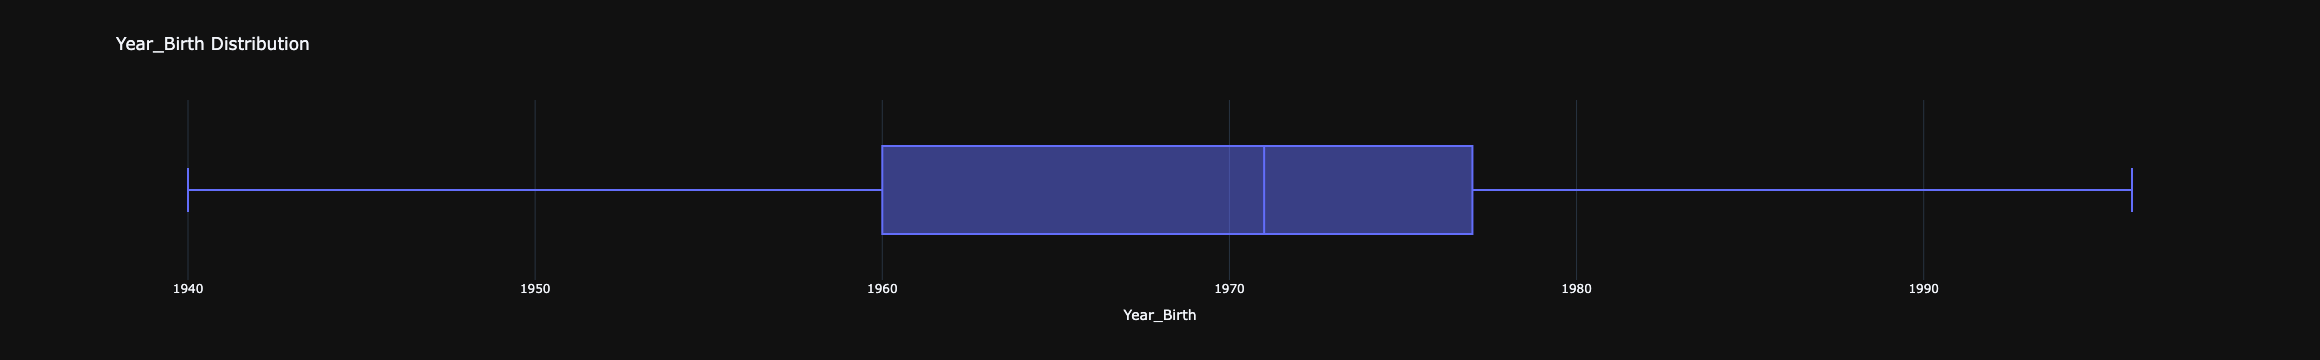

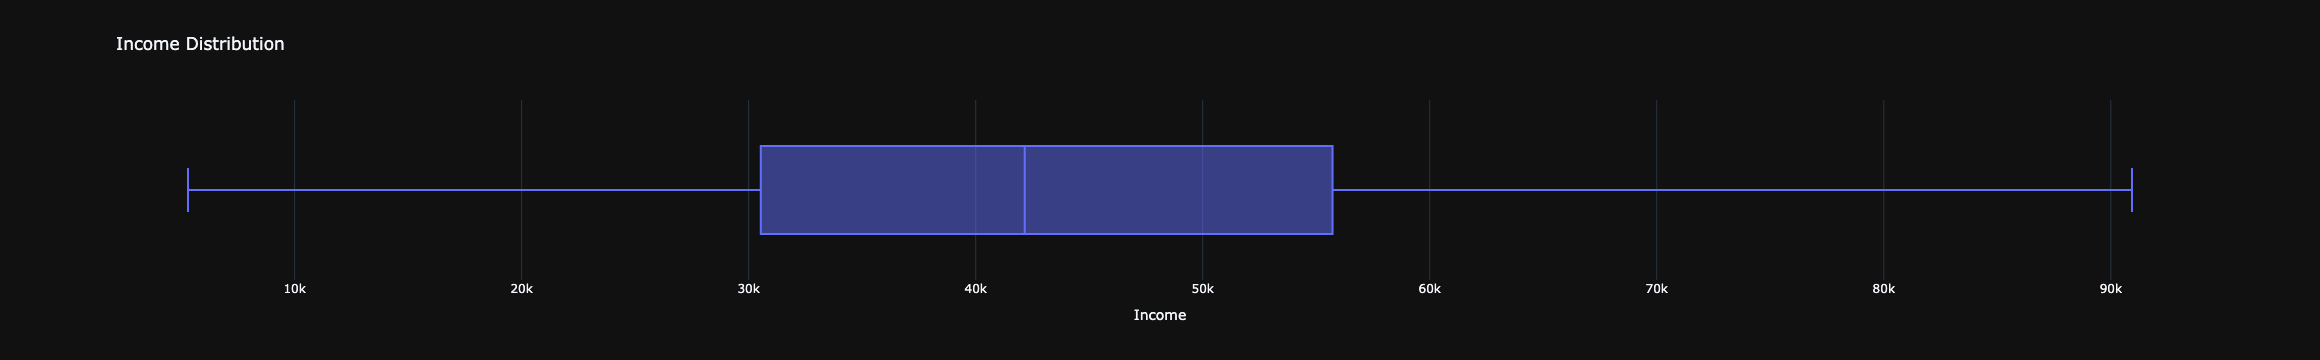

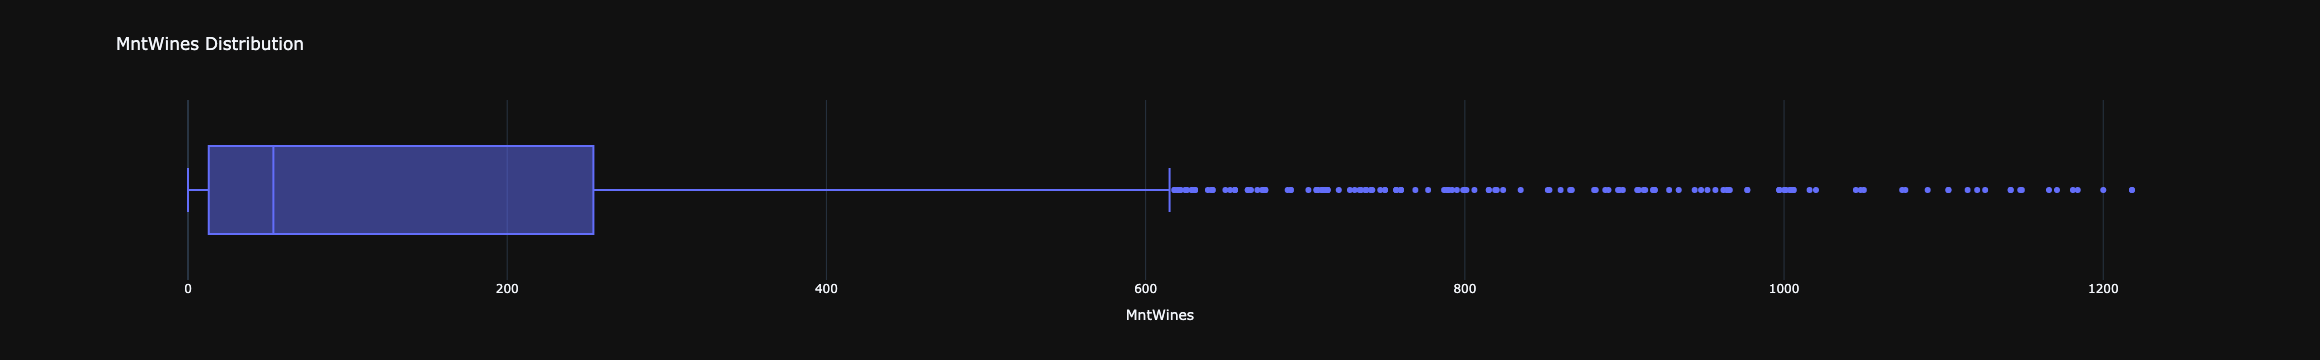

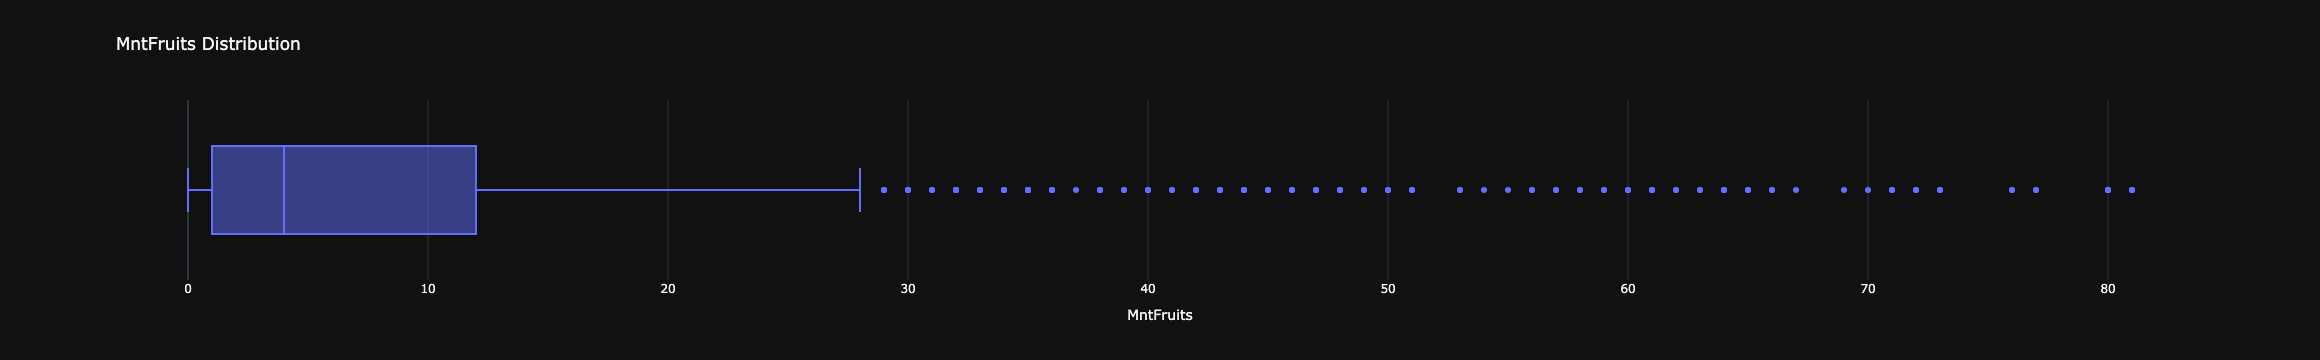

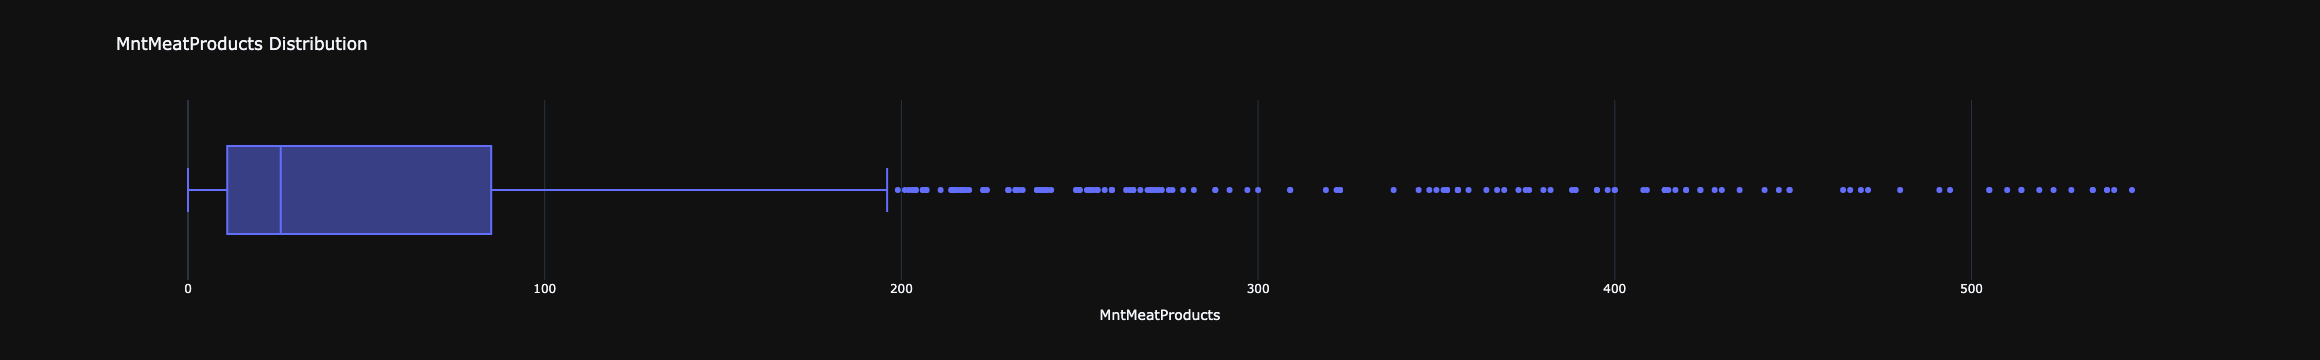

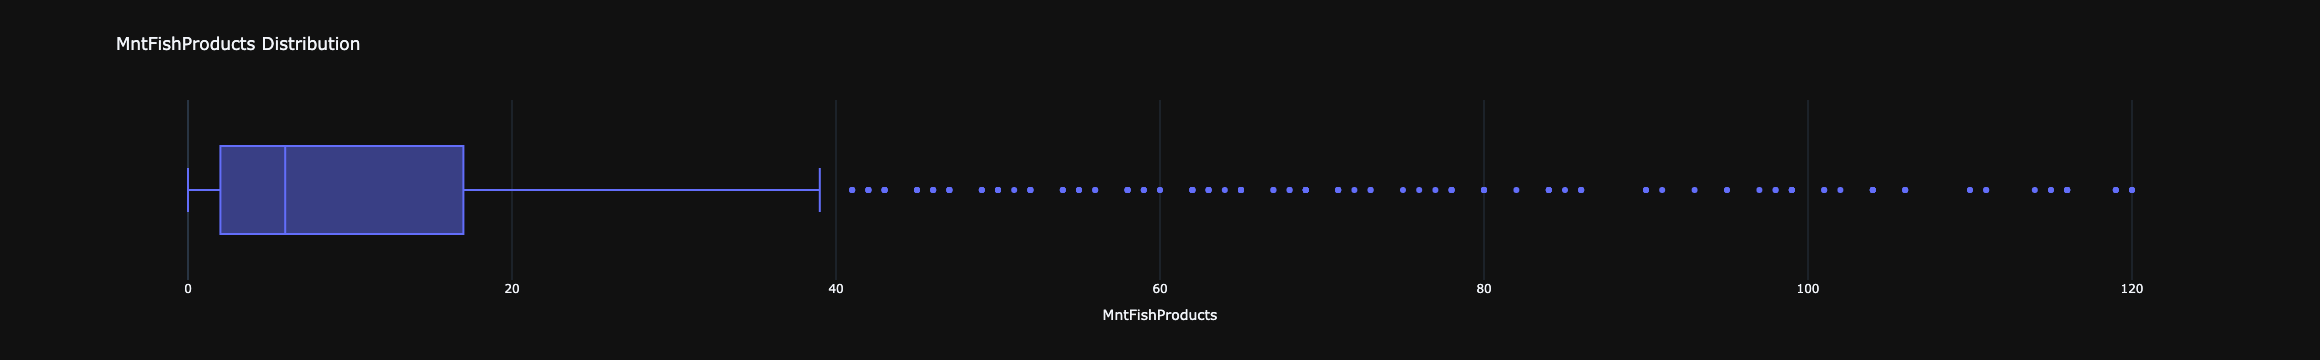

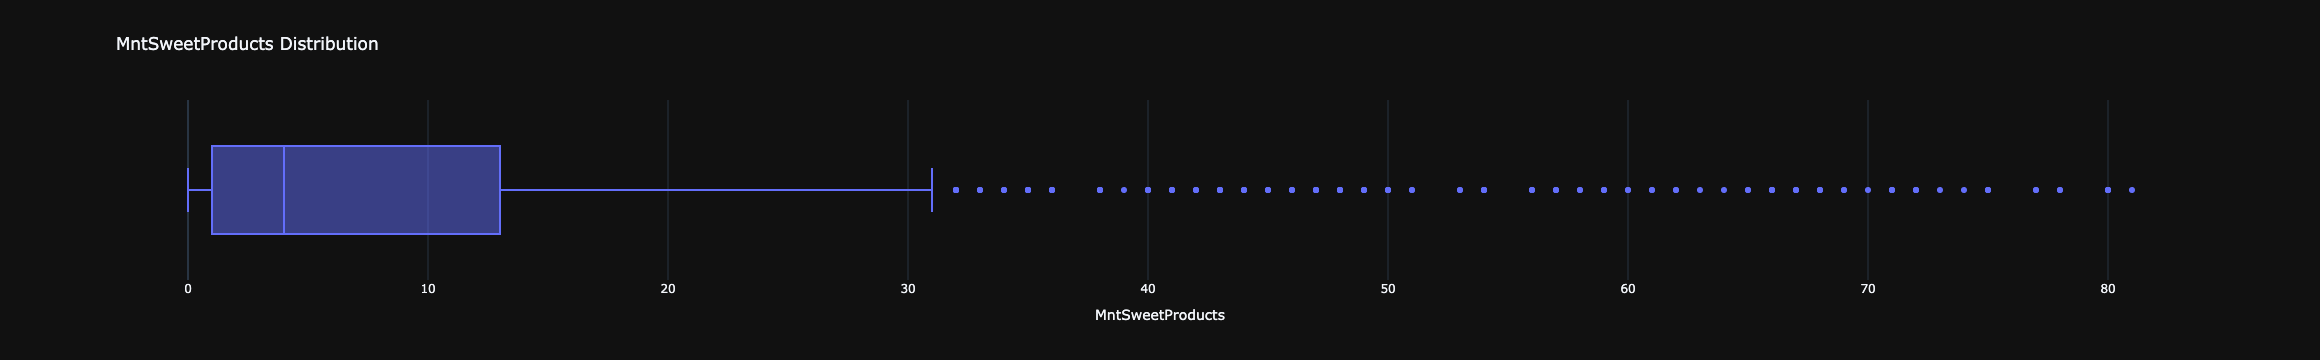

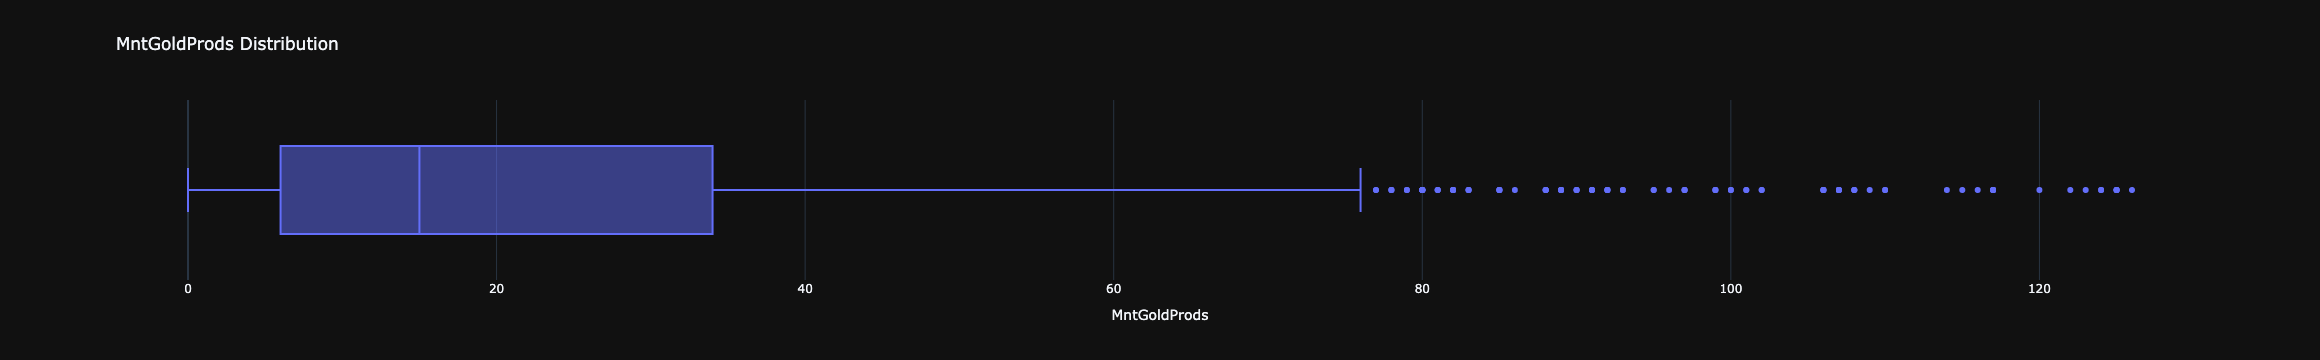

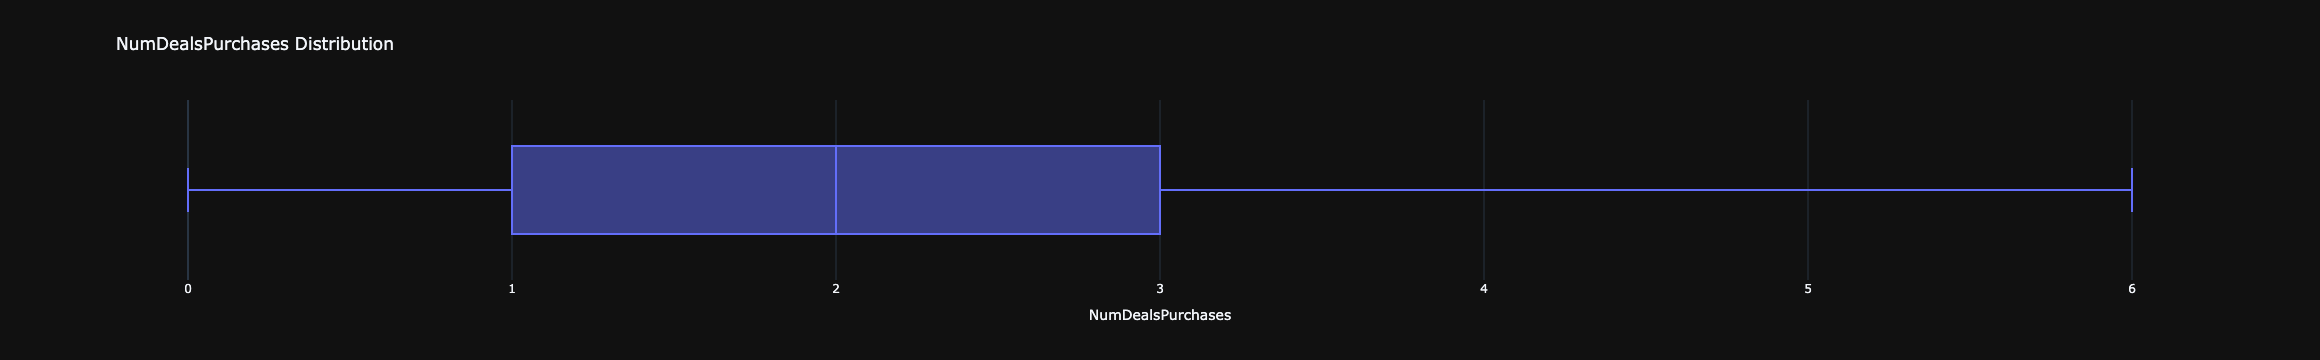

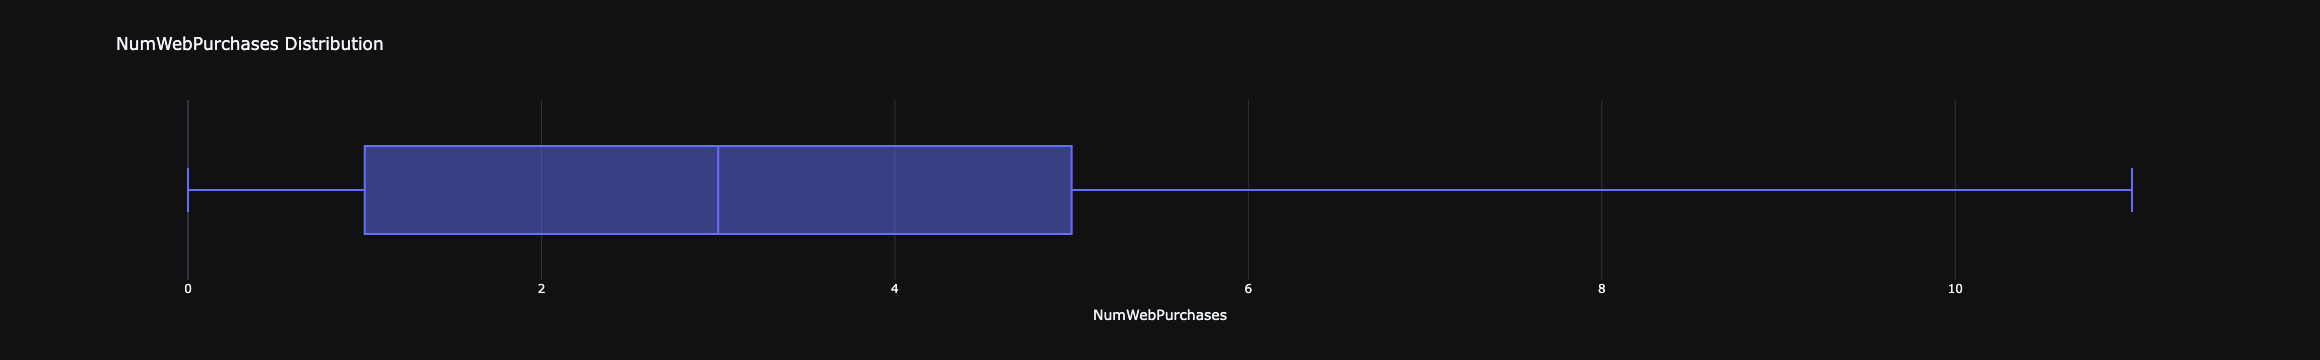

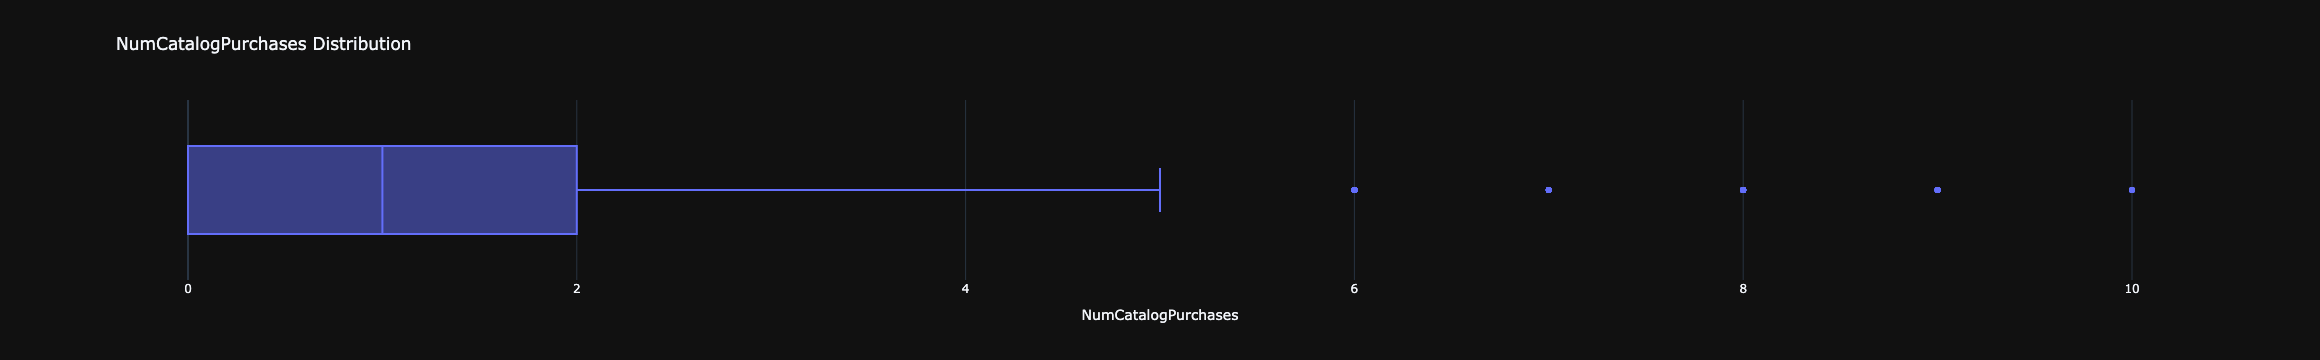

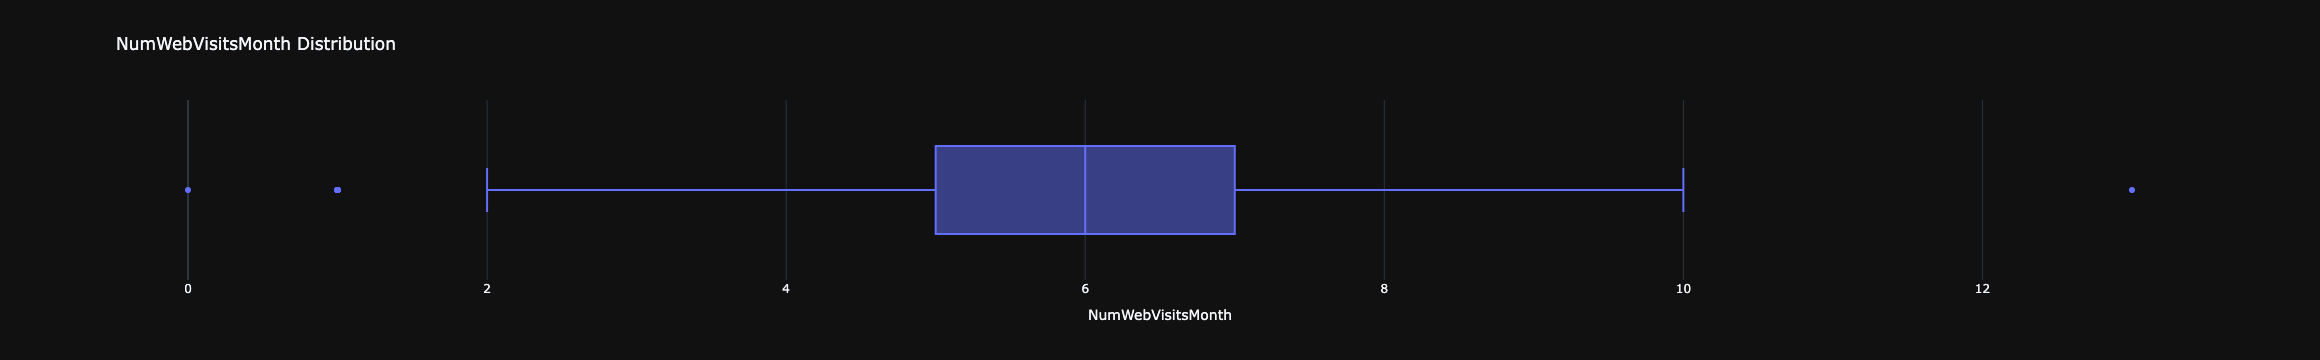

In [20]:
# Plot Boxplots for the columns to check
for feature in iqr_columns:
    
    figure = ex.box(data_cleaned_outliers, 
                    x=feature, 
                    title=feature + ' Distribution',
                    template='plotly_dark')
    
    figure.show()

# Fill NaN Values (TODO)

# Clean Non-Sense Data (TODO)